<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/%EC%B5%9C%EC%A2%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20cluster%20%EB%B6%84%EC%84%9D%20%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import font_manager, rc

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv') ## 파일 test에 저장

In [7]:
test.head(5) ## 위에서 5행까지 출력 test용

,city,p_count,s_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,291,1064,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,67,469,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,130,225,74,73904,306625,111,84,774,19468.34722,3
3,강서구,165,582,70,257494,582950,179,175,745,36675.50926,10
4,관악구,157,381,75,115329,503171,108,113,998,32421.76042,4


In [8]:
test.info()
test.columns ## 행수 count , datatype
test.isnull().sum() ## 빈칸 찾기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         25 non-null     object 
 1   p_count      25 non-null     int64  
 2   s_count      25 non-null     int64  
 3   e_count      25 non-null     int64  
 4   w_count      25 non-null     int64  
 5   people       25 non-null     int64  
 6   old          25 non-null     int64  
 7   park         25 non-null     int64  
 8   mart         25 non-null     int64  
 9   m_count      25 non-null     float64
 10  train_count  25 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.3+ KB


city           0
p_count        0
s_count        0
e_count        0
w_count        0
people         0
old            0
park           0
mart           0
m_count        0
train_count    0
dtype: int64

In [9]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성
df

,city,p_count,s_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,291,1064,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,67,469,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,130,225,74,73904,306625,111,84,774,19468.34722,3
3,강서구,165,582,70,257494,582950,179,175,745,36675.50926,10
4,관악구,157,381,75,115329,503171,108,113,998,32421.76042,4
5,광진구,104,359,74,126305,355662,152,63,580,23538.24421,11
6,구로구,156,485,77,225668,425573,142,108,664,29573.02778,8
7,금천구,87,306,67,242686,244535,190,55,973,18836.52083,1
8,노원구,233,382,66,116684,520615,117,188,529,32596.36690,13
9,도봉구,100,272,74,72939,322745,149,80,539,19826.32986,3


In [10]:
corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,p_count,s_count,e_count,w_count,people,old,park,mart,m_count,train_count
p_count,1.000000,0.622615,0.097290,0.388756,0.644402,-0.342730,0.634825,-0.415915,0.747317,-0.001389
s_count,0.622615,1.000000,0.058658,0.808650,0.633689,-0.361977,0.605871,-0.103860,0.901500,0.390341
e_count,0.097290,0.058658,1.000000,0.069948,-0.135966,-0.110169,-0.073430,-0.085598,-0.020919,-0.215196
w_count,0.388756,0.808650,0.069948,1.000000,0.133788,-0.158262,0.349522,0.315232,0.615844,0.556157
people,0.644402,0.633689,-0.135966,0.133788,1.000000,-0.433861,0.723426,-0.571025,0.850602,0.095311
old,-0.342730,-0.361977,-0.110169,-0.158262,-0.433861,1.000000,-0.297652,0.218623,-0.422811,-0.149206
park,0.634825,0.605871,-0.073430,0.349522,0.723426,-0.297652,1.000000,-0.263856,0.751372,0.363615
mart,-0.415915,-0.103860,-0.085598,0.315232,-0.571025,0.218623,-0.263856,1.000000,-0.292155,0.525210
m_count,0.747317,0.901500,-0.020919,0.615844,0.850602,-0.422811,0.751372,-0.292155,1.000000,0.356152
train_count,-0.001389,0.390341,-0.215196,0.556157,0.095311,-0.149206,0.363615,0.525210,0.356152,1.000000


In [11]:
test_data = df[['people', 's_count', 'p_count', 'm_count']]

In [12]:
tdf = df[['p_count', 's_count', 'people']] ## 열 추출해서 가공
tdf

,p_count,s_count,people
0,291,1064,537024
1,67,469,469356
2,130,225,306625
3,165,582,582950
4,157,381,503171
5,104,359,355662
6,156,485,425573
7,87,306,244535
8,233,382,520615
9,100,272,322745


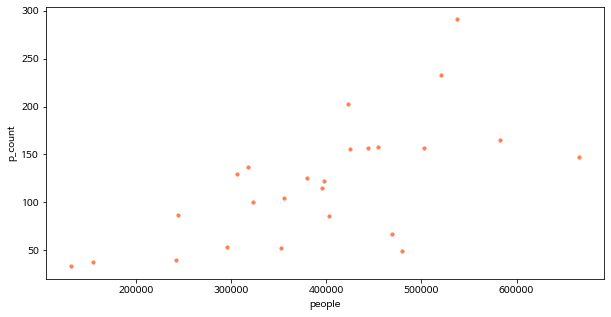

In [13]:
tdf.plot(kind='scatter', x='people', y='p_count',  c='coral', s=10, figsize=(10, 5))
plt.show()

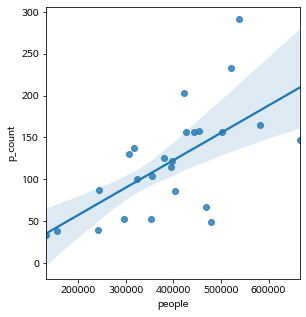

In [14]:
fig = plt.figure(figsize=(10, 5))  
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='people', y='p_count', data=tdf, ax=ax1)                 # 회귀선 표시
plt.show()

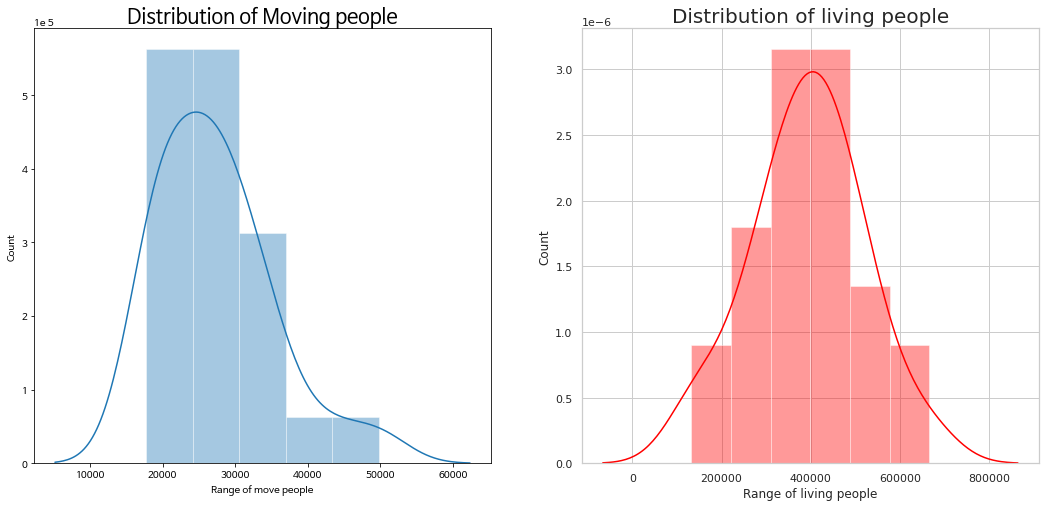

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(test_data['m_count'])
plt.title('Distribution of Moving people', fontsize = 20)
plt.xlabel('Range of move people')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(test_data['people'], color = 'red')
plt.title('Distribution of living people', fontsize = 20)
plt.xlabel('Range of living people')
plt.ylabel('Count')
plt.show()

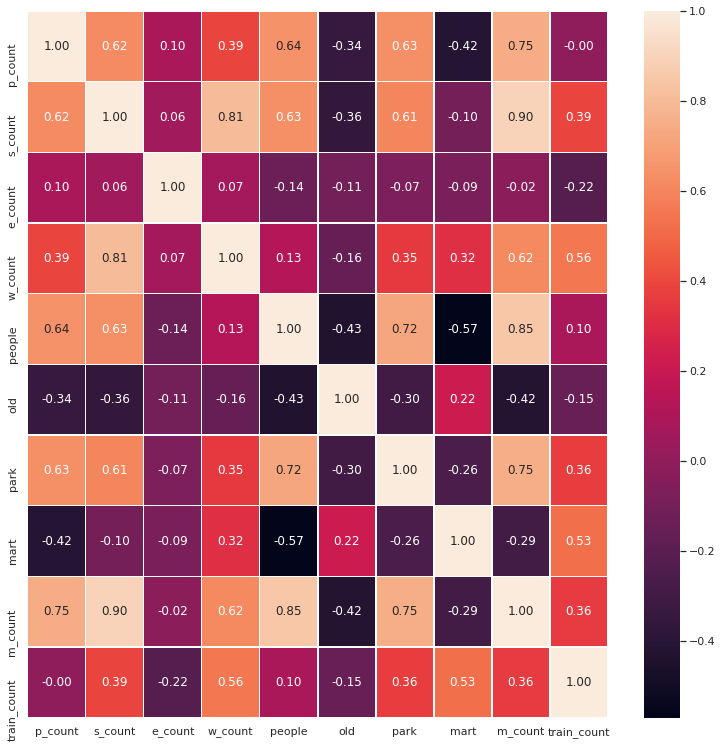

In [16]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

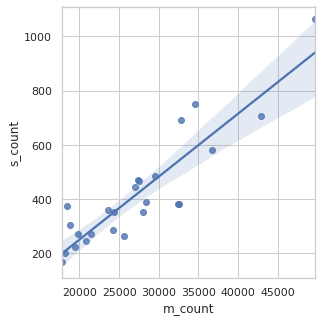

In [17]:
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='m_count', y='s_count', data=test)                 # 회귀선 표시
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


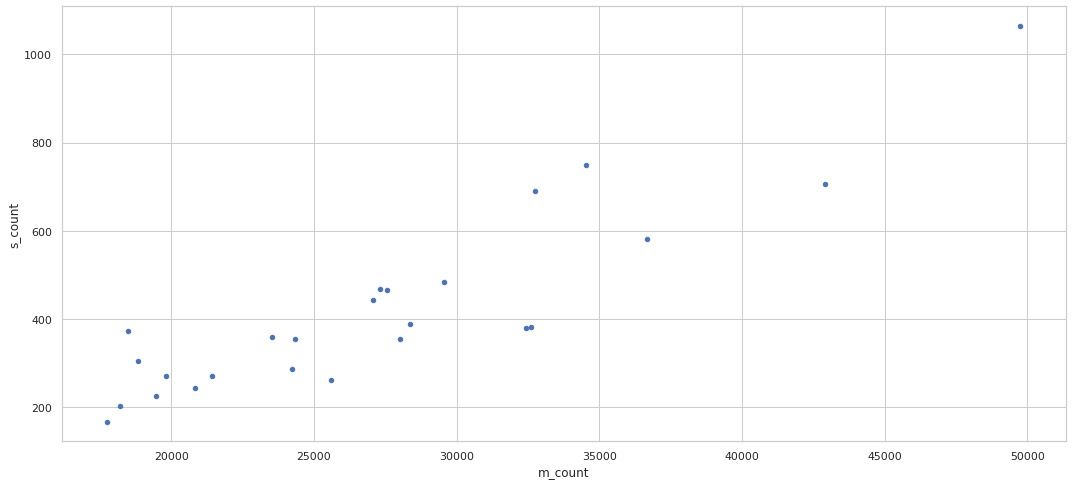

In [18]:
test.plot(kind = 'scatter', x = 'm_count', y = 's_count',)

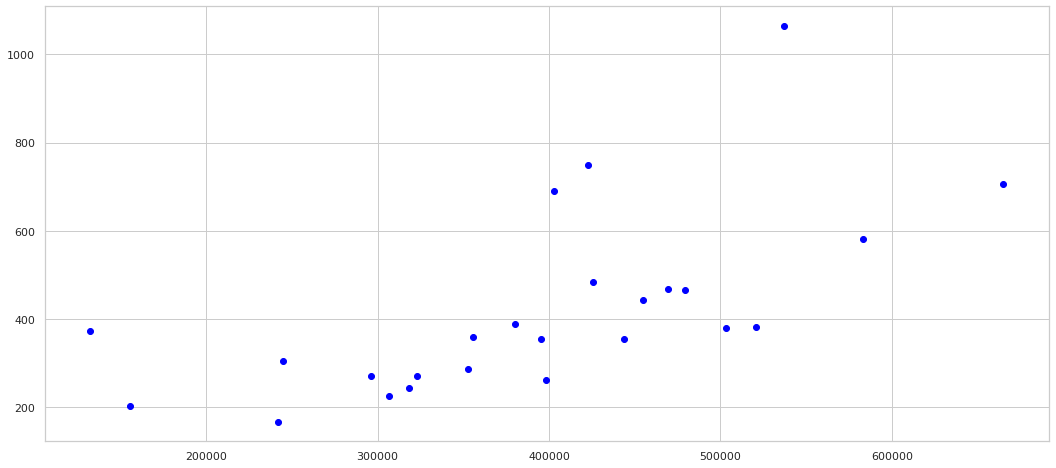

In [19]:
plt.scatter(x=tdf['people'], y=tdf['s_count'], c='blue')

In [20]:
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

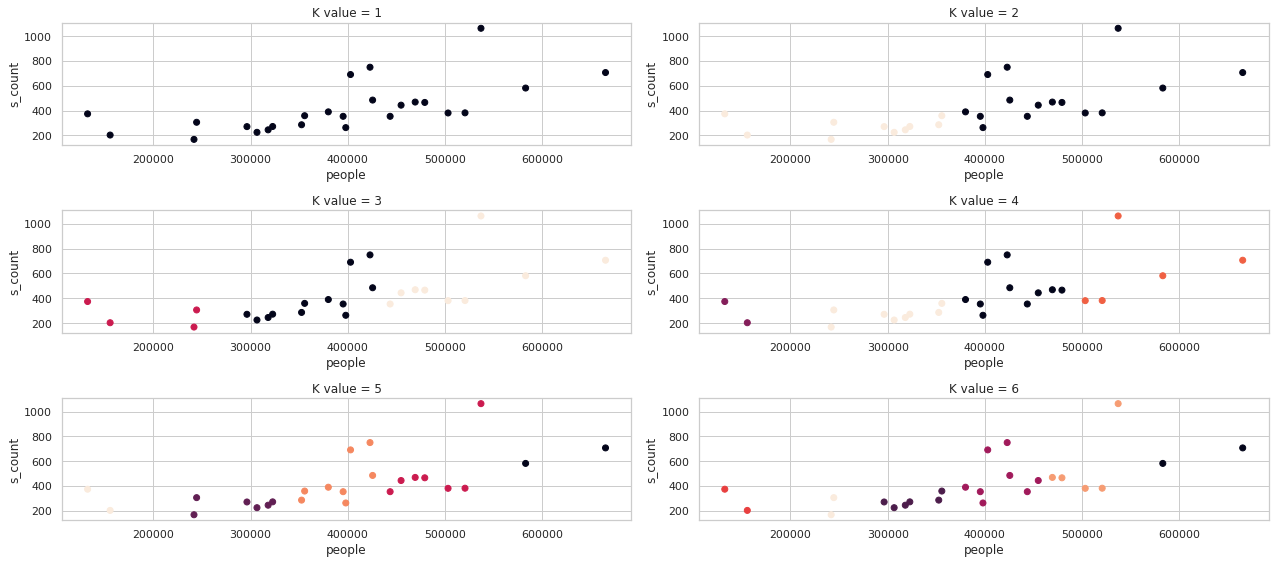

In [21]:
for i in range(1, 7):
    estimator = KMeans(n_clusters = i)
    idx = estimator.fit_predict(test_data[['people', 's_count']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i) 
    plt.subplot(3, 2, i)
    plt.tight_layout()
        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('people')
    plt.ylabel('s_count')
        # 클러스터링 그리기
    plt.scatter(test_data['people'], test_data['s_count'], c=idx)  
plt.show()

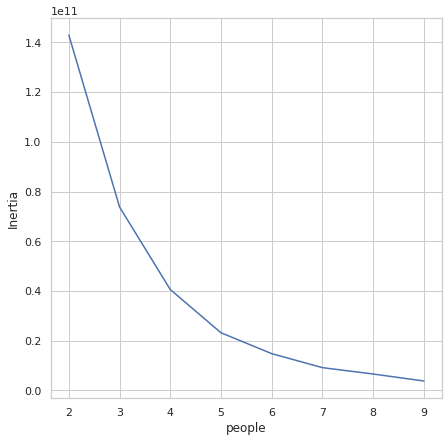

In [22]:
inertia_list = []
k_list = range(2,10)
for k in k_list:
  model = KMeans(n_clusters = k)
  model.fit(test_data)
  inertia_list.append(model.inertia_)

plt.figure(figsize = (7,7))
plt.plot(k_list, inertia_list)
plt.xlabel("people")
plt.ylabel('Inertia')
plt.show()

In [23]:
estimator = KMeans(n_clusters = 6)

In [24]:
cluster_idx = estimator.fit_predict(test_data[['people', 'm_count']])

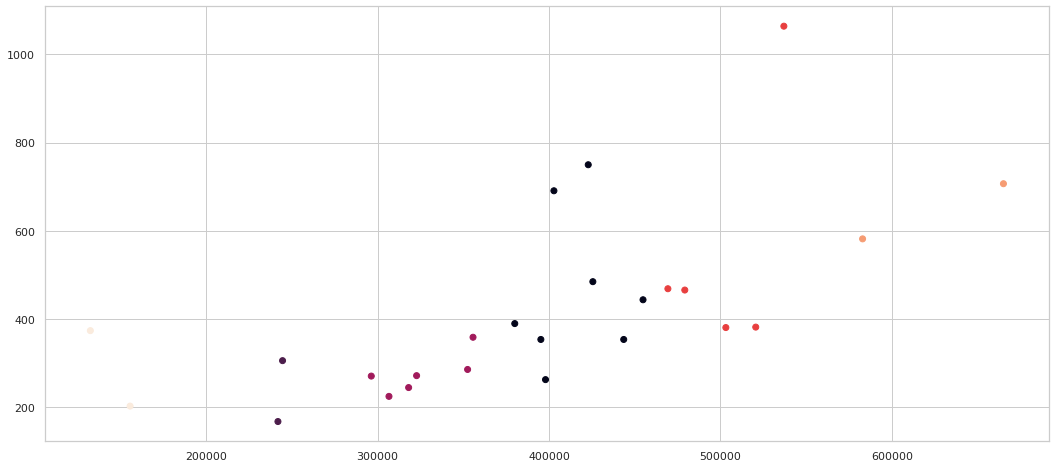

In [25]:
plt.scatter(test_data['people'], test_data['s_count'], c=cluster_idx)

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(test_data)

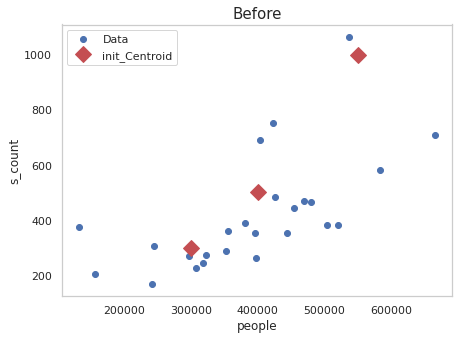

In [27]:
x1,y1 = 300000, 300
x2,y2 = 400000, 500
x3,y3 = 550000, 1000

plt.figure(figsize=(7,5))
plt.title('Before', fontsize=15)
plt.plot(test_data['people'], df['s_count'], 'o', label='Data')
plt.plot([x1,x2,x3], [y1,y2,y3], 'rD', markersize=12, label='init_Centroid')
plt.xlabel('people', fontsize=12)
plt.ylabel('s_count', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [28]:
x = test_data.iloc[:, [0, 1]].values

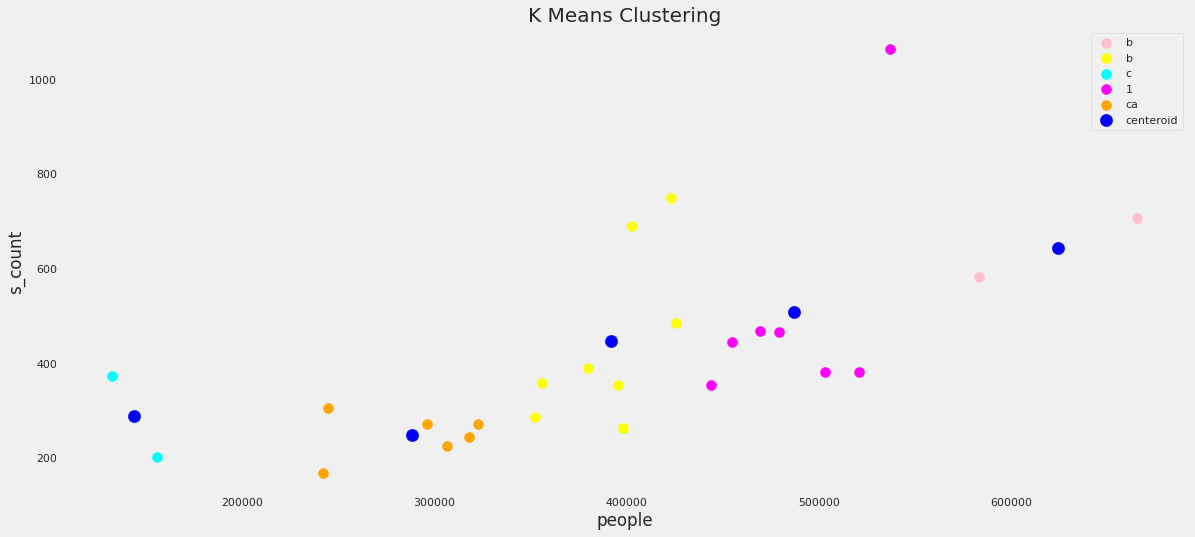

In [38]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'b')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'b')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'c')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = '1')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'ca')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('people')
plt.ylabel('s_count')
plt.legend()
plt.grid()
plt.show() # >> 여기서 순위를 분류하는데 인수와 운동센터 개수의 평균 이하를 앞순위로 배치할 예정